# Исследовательский анализ пользовательских предпочтений на Яндекс Афише осенью 2024

## Введение

## Цели и задачи проекта

<font color='#777778'>
    
**Цель проекта** - выявить изменения пользовательских предпочтений и популярности событий осенью 2024 года, проверить гипотезы о разнице в поведении пользователей мобильных и стационарных устройств.

**Задачи проекта**:

- Проанализировать сезонные изменения пользовательской активности

- Изучить динамику популярности разных типов мероприятий

- Сравнить поведение пользователей мобильных и стационарных устройств

- Выявить наиболее популярные события и партнёров

- Проверить статистические гипотезы о поведении пользователей</font>

## Описание данных


<font color='#777778'>

Таблица `final_tickets_orders_df.csv` содержит данные обо всех заказах билетов и состоит из полей: 

- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev` - количество дней с предыдущей покупки для каждого пользователя
    
Таблица `final_tickets_events_df` содержит данные о собыитиях и состоит из следующих полей:
    
- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.
    
Таблица `final_tickets_tenge_df.csv` содержит информацию о курсе тенге к российскому рублю и состоит из следующих полей:
    
- `nominal` — номинал (100 тенге).
- `data` — дата.
- `curs` — курс тенге к рублю.
- `cdx` — обозначение валюты (kzt).

</font>

## Содержимое проекта

<font color='#777778'>

1.   [Загрузка данных и знакомство с ними.](#1-bullet)
2.   [Предобработка данных и подготовка их к исследованию.](#2-bullet)
3.   [Исследовательский анализ данных.](#3-bullet)
4.   [Статистический анализ данных.](#4-bullet)
5.   [Общий вывод и рекомендации.](#5-bullet)

</font>

---

<a class="anchor" id="1-bullet"></a>
## 1. Загрузка данных и знакомство с ними

Выгрузим все данные о заказах, используя датасет `final_tickets_orders_df.csv`, данные о событиях, которые содержатся в датасете `final_tickets_events_df.csv`, а также датасет `final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю в 2024 году.

Для начала импортируем все необходимые библиотеки, используя метод `import`. С помощью методов `info()`, `describe()`, и `head()` изучим информацию о датасетах, оценим описательную статистику и выведем первые 5 строк.

In [533]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [534]:
# Загрузка данных
orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [535]:
# Функция для вывода информации о датафреймах (info, describe, head)

def display_dataframes_info(orders, events, tenge):

    print('Датафрейм ORDERS:')
    print('='*50)
    print(orders.info())
    print('\nПервые 5 строк:')
    print(orders.head())
    print('\nОписательная статистика:')
    print(orders.describe())
    
    print('\n' + '='*50)
    print('Датафрейм EVENTS:')
    print('='*50)
    print(events.info())
    print('\nПервые 5 строк:')
    print(events.head())
    print('\nОписательная статистика:')
    print(events.describe())
    
    print('\n' + '='*50)
    print('Датафрейм TENGE:')
    print('='*50)
    print(tenge.info())
    print('\nПервые 5 строк:')
    print(tenge.head())
    print('\nОписательная статистика:')
    print(tenge.describe())

display_dataframes_info(orders, events, tenge)

Датафрейм ORDERS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int

**Вывод:**

1. Датафрейм `orders`:

   - Пропуски присутствуют только в столбце `days_since_prev`, они имеют естественных характер и не требует дополнительного анализа. Этот столбец отвечает за количество дней с предыдущей покупки, если покупки не было, то данные содержат пропуск.
   - `created_dt_msk` и `created_ts_msk` можно преобразовать в `datetime`.
   - Категориальные колонки (`currency_code`, `device_type_canonical`, `service_name`) можно оптимизировать через category.
   - Остальные типы данных соответствуют ожидаемым.
   - В столбцах `total` и `revenue` среднее значение сильно превышает медиану - есть сильные выбросы в сторону больших сумм.
   - В столбцах `total` и `revenue` встречаются отрицательные значения - необходимо узнать это связано с возвратами или же это ошибка в данных. В этих же столбцах слишком большое максимальное значения - это либо большой корпоративный заказ, либо ошибка в данных.


2. Датафрейм `events`:

   - Пропуски в данных отсутствуют (не по теме, но ура, за 22 года жизни я впервые написала это слово правильно с первого раза).
   - Категориальные поля (`event_type_main`, `region_name`, `city_name`) можно перевести в `category`.
   - В столбце `venue_id` медиана = 2 849, однако максимум достигается в 4 677 - значит, есть популярные места с большим количеством мероприятий.
   - Максимальный `city_id` = 37 172, но 75% перцентиль = 213 - значит, есть города с очень редкими мероприятиями.


3. Датафрейм `tenge`:

   - Все данные заполнены.
   - `data` — можно преобразовать в `datetime`.
   - `cdx` - код валюты (все значения kzt), можно удалить или оставить как category.
   - Выбросы не обнаружены.

<a class="anchor" id="2-bullet"></a>
## 2. Предобработка данных и подготовка их к исследованию

На этом шаге нужно преобразовать типы данных, изучить выбросы, проверить данные на полные и неявные дубликаты. После этих действий мы получим очищенные данные, с которыми можно работать дальше.

#### Объединим все датафреймы в один

In [536]:
# Функция для объединения

def merge_datasets(orders, events, tenge):
    # Преобразование дат
    orders['created_dt_msk'] = pd.to_datetime(orders['created_dt_msk'])
    tenge['data'] = pd.to_datetime(tenge['data'])
    
    # orders и events
    merged = pd.merge(orders, events, on='event_id', how='left')
    
    # курс тенге по дате
    merged = pd.merge(merged, tenge, left_on=merged['created_dt_msk'].dt.date, right_on=tenge['data'].dt.date, how='left')
    
    # Удалим вспомогательные колоноки
    merged.drop(['key_0', 'data_y'], axis=1, inplace=True, errors='ignore')
    return merged

df = merge_datasets(orders, events, tenge)
df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,...,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",2024-10-27,100,19.9266,kzt
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,...,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",2024-10-27,100,19.9266,kzt
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,...,Каменевский регион,Глиногорск,213.0,3470.0,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68",2024-10-30,100,19.9516,kzt
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,...,Широковская область,Ягодиновка,239.0,2449.0,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4",2024-09-24,100,19.3967,kzt


In [537]:
# Проверим результаты объединения

print('Размер финального датафрейма:', df.shape)
print('\nИнформация о типах данных:')
print(df.dtypes)

Размер финального датафрейма: (290849, 28)

Информация о типах данных:
order_id                           int64
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk                    object
event_id                           int64
cinema_circuit                    object
age_limit                          int64
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                      int64
total                            float64
days_since_prev                  float64
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                          float64
venue_id                         float64
venue_name                 

In [538]:
# Проверка пропусков

print(df.isna().sum()) # количество пропусков
print(df.isna().sum() / len(df)) # доля пропусков

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
data                          0
nominal                       0
curs                          0
cdx                           0
dtype: int64
order_id                  0.000000
user_id                   0.000000
created_dt_msk       

- В столбце `days_since_prev` проупски логичны - не совершалось покупок
- Возникли пропуски в данных о мероприятиях: некоторые `event_id` не найдены в справочнике мероприятий - доля пропусков незначительно, их можно удалить.

In [539]:
# Удаление пропусков
df = df.dropna(subset=['event_name'])

# Проверка 
print('Осталось пропусков:')
print(df.isna().sum())

Осталось пропусков:
order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
data                          0
nominal                       0
curs                          0
cdx                           0
dtype: int64


#### Проанализируем ключевые столбцы

In [540]:
# Проверка уникальных значений в категориальных переменных

cat_cols = ['currency_code', 'service_name', 'device_type_canonical', 
            'event_type_main', 'cinema_circuit', 'region_name']

for col in cat_cols:
    print(f"\n--- Уникальные значения в {col} ({df[col].nunique()}) ---")
    print(df[col].unique())


--- Уникальные значения в currency_code (2) ---
['rub' 'kzt']

--- Уникальные значения в service_name (36) ---
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете']

--- Уникальные значения в device_type_canonical (2) ---
['mobile' 'desktop']

--- Уникальные значения в event_type_main (7) ---
['театр' 'выставки' 'другое' 'стендап' 'концерты' 'спорт' 'ёлки']

--- Уникальные значения в cinema_circuit (6) ---
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм']

--- Уникальные значения в region_name (81) ---
['Каменевский 

In [541]:
# Проверка уникальных значений в количественных данных

num_cols = ['age_limit', 'tickets_count', 'revenue', 'total']

for col in num_cols:
    print(f"\n--- Уникальные значения в {col} ---")
    print(f"Всего: {df[col].nunique()}")
    print(f"Примеры: {np.sort(df[col].unique())}") 


--- Уникальные значения в age_limit ---
Всего: 5
Примеры: [ 0  6 12 16 18]

--- Уникальные значения в tickets_count ---
Всего: 22
Примеры: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19 27 30 37 47 57]

--- Уникальные значения в revenue ---
Всего: 42522
Примеры: [-9.076000e+01 -1.794000e+01 -1.077000e+01 ...  4.870472e+04  6.493963e+04
  8.117454e+04]

--- Уникальные значения в total ---
Всего: 55458
Примеры: [-3.5885000e+02 -2.2467000e+02 -2.1531000e+02 ...  4.8704722e+05
  6.4939630e+05  8.1174540e+05]


#### Изучим выбросы сначала для заказах, оплаченных российскими рублями, после - для заказов в тенге

In [542]:
# Разделим данные по валютам
rub_data = df[df['currency_code'] == 'rub']
kzt_data = df[df['currency_code'] == 'kzt']

Статистика revenue:
count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64


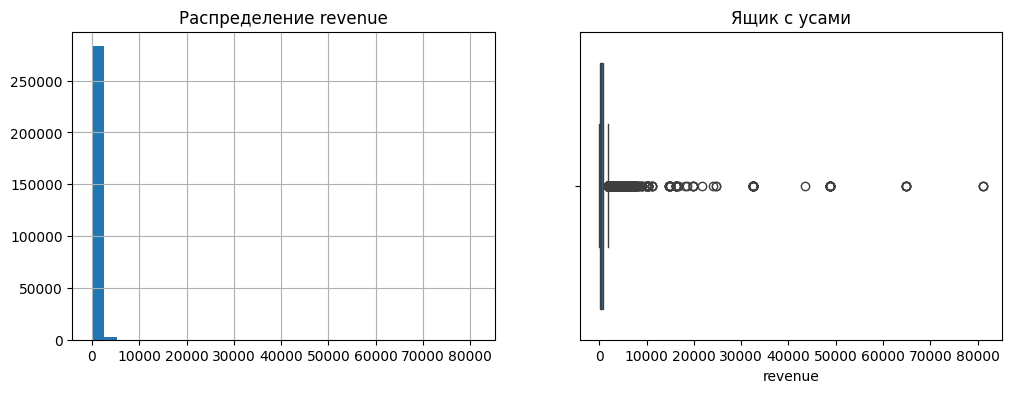

In [543]:
# Описательная статистика
print("Статистика revenue:")
print(rub_data['revenue'].describe())

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
rub_data['revenue'].hist(bins=30)
plt.title('Распределение revenue')

plt.subplot(1, 2, 2)
sns.boxplot(x=rub_data['revenue'])
plt.title('Ящик с усами')
plt.show()

- Минимальное значение отрицательно, что говорит об ошибке в данных
- Максимальное значение равняется 81 175, что является явным выбросом
- Гистограмма иллюстрирует сильную правостороннюю асимметрию. Большая часть заказов состредоточено в диапозоне до 2000 рублей, но есть редкие выбросы с аномально высокой выручкой.
- Ящик с усами подтверждает наличие значительных выбросов - значения выше 10 000 рублей.

In [544]:
# Удалим отрицательные значения
rub_data = rub_data[rub_data['revenue'] >= 0]

# Ограничение выбросов 99%-перцентилем
max_revenue = rub_data['revenue'].quantile(0.99)
rub_data['revenue'] = rub_data['revenue'].clip(upper=max_revenue)

Статистика revenue:
count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64


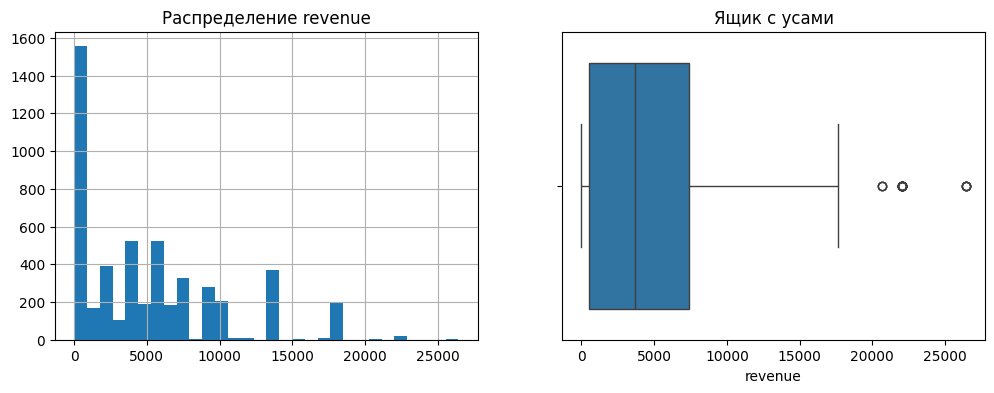

In [545]:
# Описательная статистика
print("Статистика revenue:")
print(kzt_data['revenue'].describe())

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
kzt_data['revenue'].hist(bins=30)
plt.title('Распределение revenue')

plt.subplot(1, 2, 2)
sns.boxplot(x=kzt_data['revenue'])
plt.title('Ящик с усами')
plt.show()

- Основная часть заказов сосредоточена до 15 000 тенге
- В KZT чаще встречаются крупные заказы (медиана в 2 раза выше, чем в RUB).
- Заказы с выручкой > 15,000 KZT - явные выбросы.

In [546]:
# Ограничение выбросов по 99%-му перцентилю
max_rev = kzt_data['revenue'].quantile(0.99)
kzt_data.loc[:, 'revenue'] = kzt_data['revenue'].clip(upper=max_rev)


Статистика tickets_count:
tickets_count
3     92247
2     83807
4     54812
1     41798
5     13476
6      4283
7        62
9        38
8        21
10       19
11       13
13        7
17        6
19        5
12        4
14        4
15        2
27        2
30        2
47        1
57        1
37        1
Name: count, dtype: int64


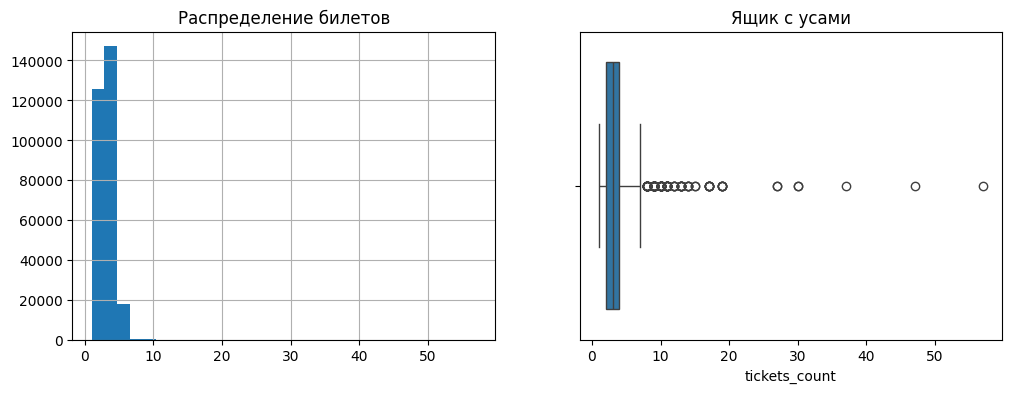

In [547]:
print('\nСтатистика tickets_count:')
print(df['tickets_count'].value_counts())

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['tickets_count'].hist(bins=30)
plt.title('Распределение билетов')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['tickets_count'])
plt.title('Ящик с усами')
plt.show()

- Большинство заказов содержат до 5 билетов
- Экстремальные значения: 47, 57 билетов в одном заказе

Если ограничить выбросы по 99%-перцентилем, то удаляется слишком много данных, удалим значения, больше 40.

In [548]:
# Удаляем заказы с количеством билетов > 40
df_clean = df[df['tickets_count'] <= 40]

Данные были очищены для отдельных датафреймов `rub_data` и `kzt_data`, поэтому необходимо объединить данные обратно

In [549]:
df = pd.concat([rub_data, kzt_data])

Данные очищены от пропусков и выбросов, теперь поработаем с явными и неявными дубликатами

In [550]:
# Проверим количество явных дубликатов
duplicates_count = df.duplicated().sum()

print(f'Количество явных дубликатов: {duplicates_count}')

Количество явных дубликатов: 0


Один пользователь не мог совершить в одну секунду несколько заказов, проверим есть ли у нас такие данные. При наличии - удалим.

In [551]:
# Изучим неявные дубликаты
df.loc[df.duplicated(subset=['user_id', 'created_ts_msk'], keep=False)]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
4358,1158638,02ea4583333f064,2024-08-23,2024-08-23 22:46:05,540072,нет,12,rub,mobile,89.61,...,Зеленоградский округ,Шаныртау,24.0,2309.0,"Молодежный культурный проект ""Angle"" Лимитед","бул. Ушакова, д. 9 стр. 389",2024-08-23,100,19.1903,kzt
4359,1158696,02ea4583333f064,2024-08-23,2024-08-23 22:46:05,540072,нет,12,rub,mobile,59.74,...,Зеленоградский округ,Шаныртау,24.0,2309.0,"Молодежный культурный проект ""Angle"" Лимитед","бул. Ушакова, д. 9 стр. 389",2024-08-23,100,19.1903,kzt
5723,1536363,02ea4583333f064,2024-10-16,2024-10-16 17:49:44,425265,нет,16,rub,mobile,651.54,...,Североярская область,Озёрск,2.0,1854.0,"Научно-культурный центр ""Туман"" Лтд","ул. Дальневосточная, д. 4/6",2024-10-16,100,20.0393,kzt
5727,5271215,02ea4583333f064,2024-10-16,2024-10-16 17:49:44,534709,нет,18,rub,mobile,976.17,...,Каменевский регион,Глиногорск,213.0,3916.0,"Клуб истории искусств ""Созидатель"" Инкорпорэйтед","наб. Чапаева, д. 15",2024-10-16,100,20.0393,kzt
6084,4952505,02ea4583333f064,2024-10-27,2024-10-27 16:39:40,188276,нет,6,rub,mobile,752.51,...,Озернинский край,Родниковецк,240.0,1429.0,"Молодежный клуб ""Долина"" Групп","пр. Осенний, д. 5/8 к. 6/1",2024-10-27,100,19.9266,kzt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32464,161502,110125b4a429b43,2024-06-12,2024-06-12 10:23:35,536826,нет,12,kzt,mobile,17617.24,...,Верхоречная область,Серебрянка,163.0,2066.0,"Архитектурное бюро ""Секрет"" Инк","пер. Проточный, д. 70 к. 881",2024-06-12,100,19.8655,kzt
188274,6446643,9bbe3534bbaa8e1,2024-07-03,2024-07-03 15:41:28,538828,нет,12,kzt,mobile,7103.29,...,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",2024-07-03,100,18.5176,kzt
188275,6446614,9bbe3534bbaa8e1,2024-07-03,2024-07-03 15:41:28,538828,нет,12,kzt,mobile,2367.76,...,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376",2024-07-03,100,18.5176,kzt
209252,3320153,ae8e3d5af3036a6,2024-07-30,2024-07-30 11:20:46,533803,нет,16,kzt,mobile,1849.41,...,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-07-30,100,18.2287,kzt


In [552]:
# Удалим неявные дубликаты
df.drop_duplicates(subset=['user_id', 'created_ts_msk'], keep='first', inplace=True)

#### Преобразование типов данных

In [553]:
# Колонки с датами
date_cols = ['created_dt_msk', 'created_ts_msk']

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [554]:
# Целочисленные колонки
int_cols = ['age_limit', 'tickets_count', 'nominal']
df[int_cols] = df[int_cols].astype('int16')  

# Вещественные колонки
float_cols = ['revenue', 'total', 'curs']
df[float_cols] = df[float_cols].astype('float32') 

In [555]:
# Категориальные колонки
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].nunique() < 50:  # Порог 
        df[col] = df[col].astype('category')

print(df[cat_cols].dtypes)

user_id                     object
cinema_circuit            category
currency_code             category
device_type_canonical     category
service_name              category
event_name                  object
event_type_description    category
event_type_main           category
organizers                  object
region_name                 object
city_name                   object
venue_name                  object
venue_address               object
cdx                       category
dtype: object


#### Создадим новые столбцы

In [556]:
# Конвертируем KZT в RUB 
df['revenue_rub'] = np.where(
    df['currency_code'] == 'kzt',
    df['revenue'] * (df['curs'] / 100),
    df['revenue']
)

In [557]:
# Выручка за один билет
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']

In [558]:
# Месяц оформления заказа
df['month'] = pd.to_datetime(df['created_dt_msk']).dt.month

In [559]:
# Сезонность
season_map = {
    12: 'зима', 1: 'зима', 2: 'зима',
    3: 'весна', 4: 'весна', 5: 'весна',
    6: 'лето', 7: 'лето', 8: 'лето',
    9: 'осень', 10: 'осень', 11: 'осень'
}
df['season'] = df['month'].map(season_map)

In [560]:
# Проверка
df.head(5)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.697201,kzt,1521.939941,380.484985,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.341900,kzt,289.450012,144.725006,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.647499,kzt,1258.569946,314.642487,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.500999,kzt,8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.664801,kzt,1390.410034,463.470001,10,осень


In [561]:
# Оптимизация типов данных
df['month'] = df['month'].astype('int8')
df['season'] = df['season'].astype('category')
df['revenue_rub'] = df['revenue_rub'].astype('float32')
df['one_ticket_revenue_rub'] = df['one_ticket_revenue_rub'].astype('float32')

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290062 entries, 0 to 290727
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290062 non-null  int64         
 1   user_id                 290062 non-null  object        
 2   created_dt_msk          290062 non-null  datetime64[ns]
 3   created_ts_msk          290062 non-null  datetime64[ns]
 4   event_id                290062 non-null  int64         
 5   cinema_circuit          290062 non-null  category      
 6   age_limit               290062 non-null  int16         
 7   currency_code           290062 non-null  category      
 8   device_type_canonical   290062 non-null  category      
 9   revenue                 290062 non-null  float32       
 10  service_name            290062 non-null  category      
 11  tickets_count           290062 non-null  int16         
 12  total                   290062 non-

**Вывод:**
- Проведена оптимизация типов данных
- Были удалены неявные дубликаты и выбросы
- Явные дубликаты не обнаружены
- Были созданы новые колонки: выручка в рублях, средняя стоимость одного билета, временные метки для анализа сезонности.
- Осталось 290062 данных.

<a class="anchor" id="3-bullet"></a>
## 3. Исследовательский анализ данных

###  Анализ распределения заказов по сегментам и их сезонные изменения

In [563]:
# Группировка по месяцам
monthly_orders = df.groupby('month')['order_id'].count().reset_index()

In [564]:
# Подсчет количества заказов по месяцам
monthly_orders = monthly_orders.rename(columns={'order_id': 'total_orders'})

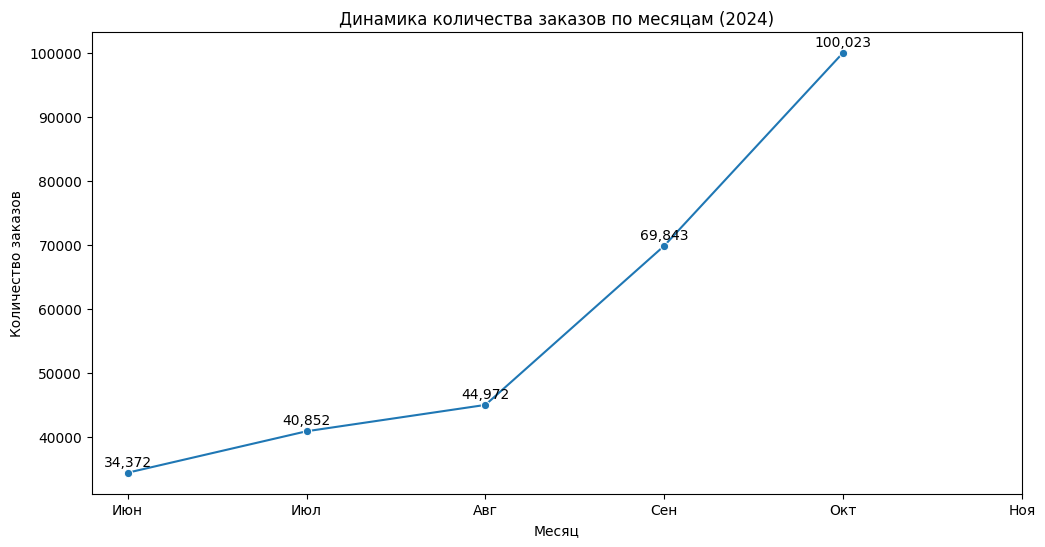

In [565]:
# Визуализация динамики заказов по месяцам
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=monthly_orders, 
                  x='month', 
                  y='total_orders', 
                  marker='o')

# Подписи значений
for x, y in zip(monthly_orders['month'], monthly_orders['total_orders']):
    ax.text(x, y+1000, f'{y:,}', ha='center')

plt.title('Динамика количества заказов по месяцам (2024)')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(6, 12), 
           ['Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя'])

plt.show()

**Вывод:**
- Наблюдается резкий рост заказов с июня по октябрь
- Пик культурных событий выпал на октябрь

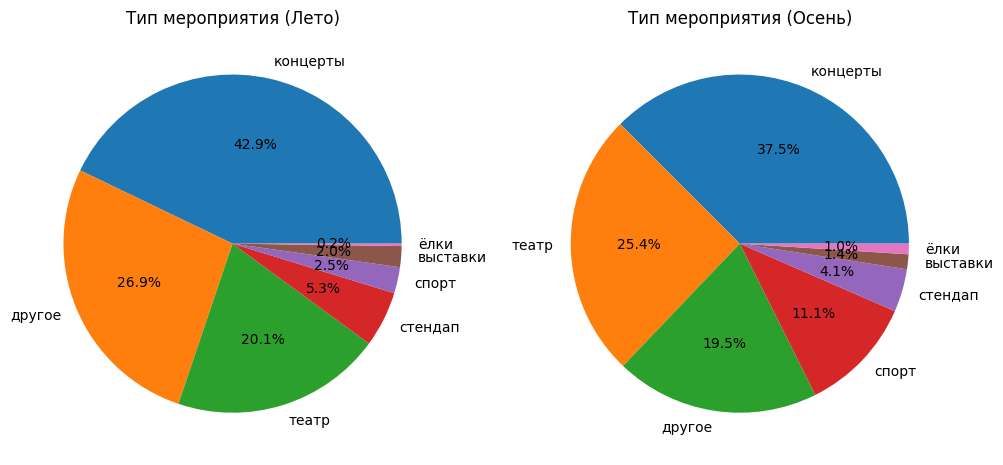

In [566]:
# Фильтрация данных
summer = df[df['season'] == 'лето']
autumn = df[df['season'] == 'осень']

# Функция для визуализации долей
def plot_season_comparison(data_summer, data_autumn, column, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Лето
    summer_counts = data_summer[column].value_counts(normalize=True)
    ax1.pie(summer_counts, 
            labels=summer_counts.index, 
            autopct='%.1f%%')
    ax1.set_title(f'{title} (Лето)')
    
    # Осень
    autumn_counts = data_autumn[column].value_counts(normalize=True)
    ax2.pie(autumn_counts, 
            labels=autumn_counts.index, 
            autopct='%.1f%%')
    ax2.set_title(f'{title} (Осень)')
    
    plt.show()
    
# Сезонность
plot_season_comparison(summer, autumn, 'event_type_main', 'Тип мероприятия')

**Вывод:**
- Летом доминируют концерты (42.9%) и иные мероприятия (26.9%)
- Осенью концерты сохраняются в топе (37.5%), но вырастает доля театров (25.4%)

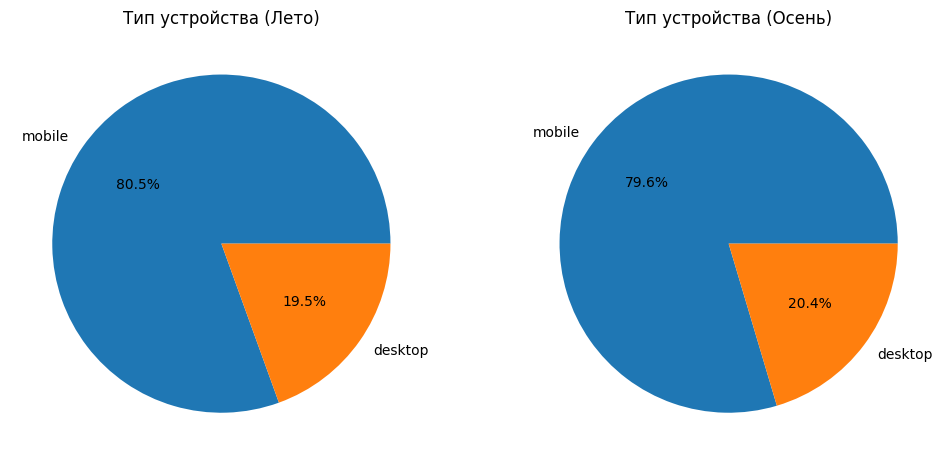

In [567]:
# Тип устройства
plot_season_comparison(summer, autumn, 'device_type_canonical', 'Тип устройства')

**Вывод:**
- Доля мобильных заказов остается практически неизменной и летом, и осенью.

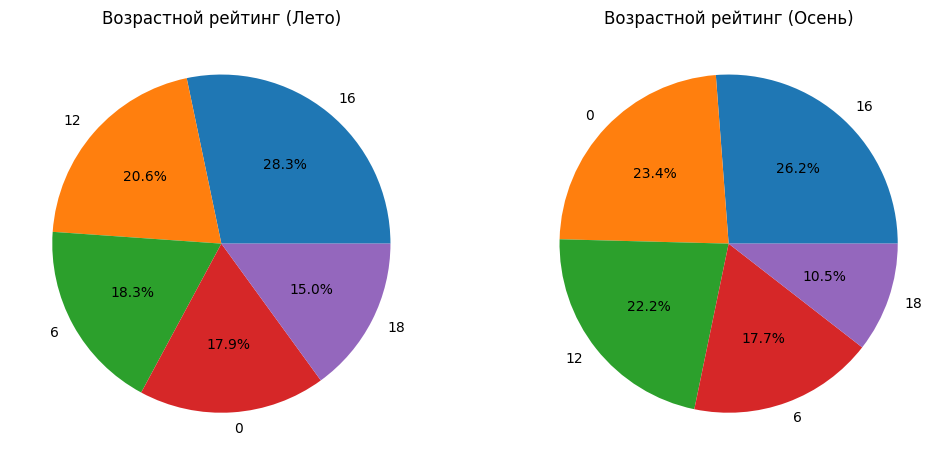

In [568]:
# Возрастной рейтинг
plot_season_comparison(summer, autumn, 'age_limit', 'Возрастной рейтинг')

**Вывод:**
- Осенью преобладают семейные мероприятия с ограничениями 0+, 6+, 12+
- Летом рост "взрослых" категорий

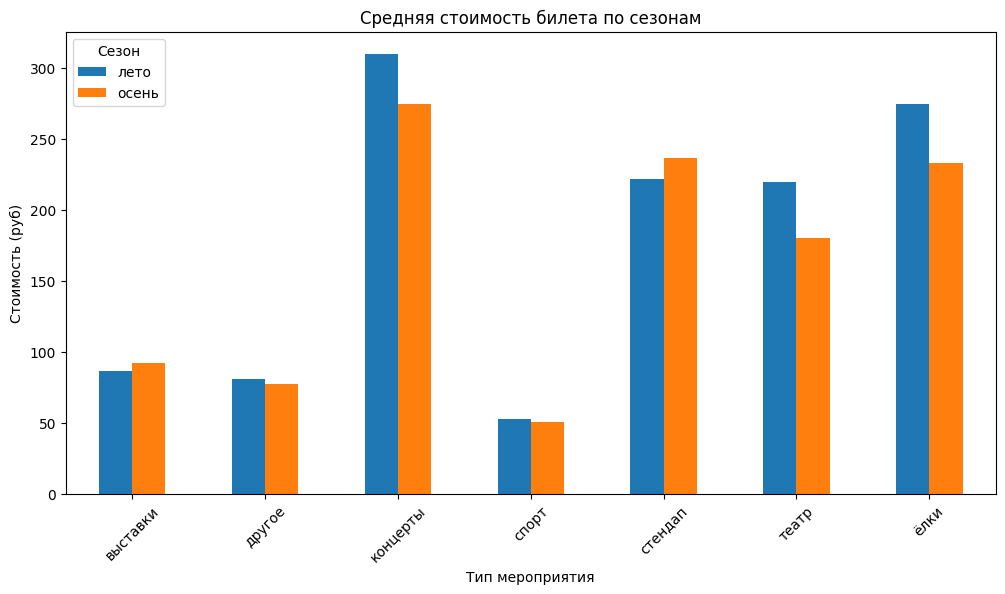

In [569]:
# Средняя выручка за билет по сезонам и типам мероприятий
ticket_revenue = df.groupby(['event_type_main', 'season'], observed=True)['one_ticket_revenue_rub'].mean().unstack() \
  .plot(kind='bar', figsize=(12, 6))

plt.title('Средняя стоимость билета по сезонам')
plt.xlabel('Тип мероприятия')
plt.ylabel('Стоимость (руб)')
plt.xticks(rotation=45)
plt.legend(title='Сезон')
plt.show()

**Вывод:**
- Летом цены на концерты, театры и ёлки значительно выше, чем осенью
- На стендап средняя стоимость билета выше осенью
- На остальные мероприятия стоимость билетов примерно равная

**Общий вывод:**\
*С наступлением осени:*
- Количество заказов резко возрастает
- Происходит рост "интеллектуального" досуга (театр)
- Увеличивается продажа билетов, доступных для детей, младше 16 лет
- Средняя стоимость билета растет для театра и кино, но снижается для концертов

### Осенняя активность пользователей

In [570]:
# Фильтрация осенних данных (месяцы 9 и 10)
autumn_data = df[df['month'].isin([9, 10])].copy()

In [571]:
# Сводная таблица по дням
daily_stats = autumn_data.groupby(pd.to_datetime(autumn_data['created_dt_msk']).dt.date).agg(
    total_orders=('order_id', 'count'),
    dau=('user_id', pd.Series.nunique),
    avg_revenue_per_ticket=('one_ticket_revenue_rub', 'mean')
).reset_index()

In [572]:
# Добавляем день недели
daily_stats['day_of_week'] = pd.to_datetime(daily_stats['created_dt_msk']).dt.day_name()
daily_stats['is_weekend'] = daily_stats['day_of_week'].isin(['Saturday', 'Sunday'])

In [573]:
# Заказов на пользователя
daily_stats['orders_per_user'] = daily_stats['total_orders'] / daily_stats['dau']

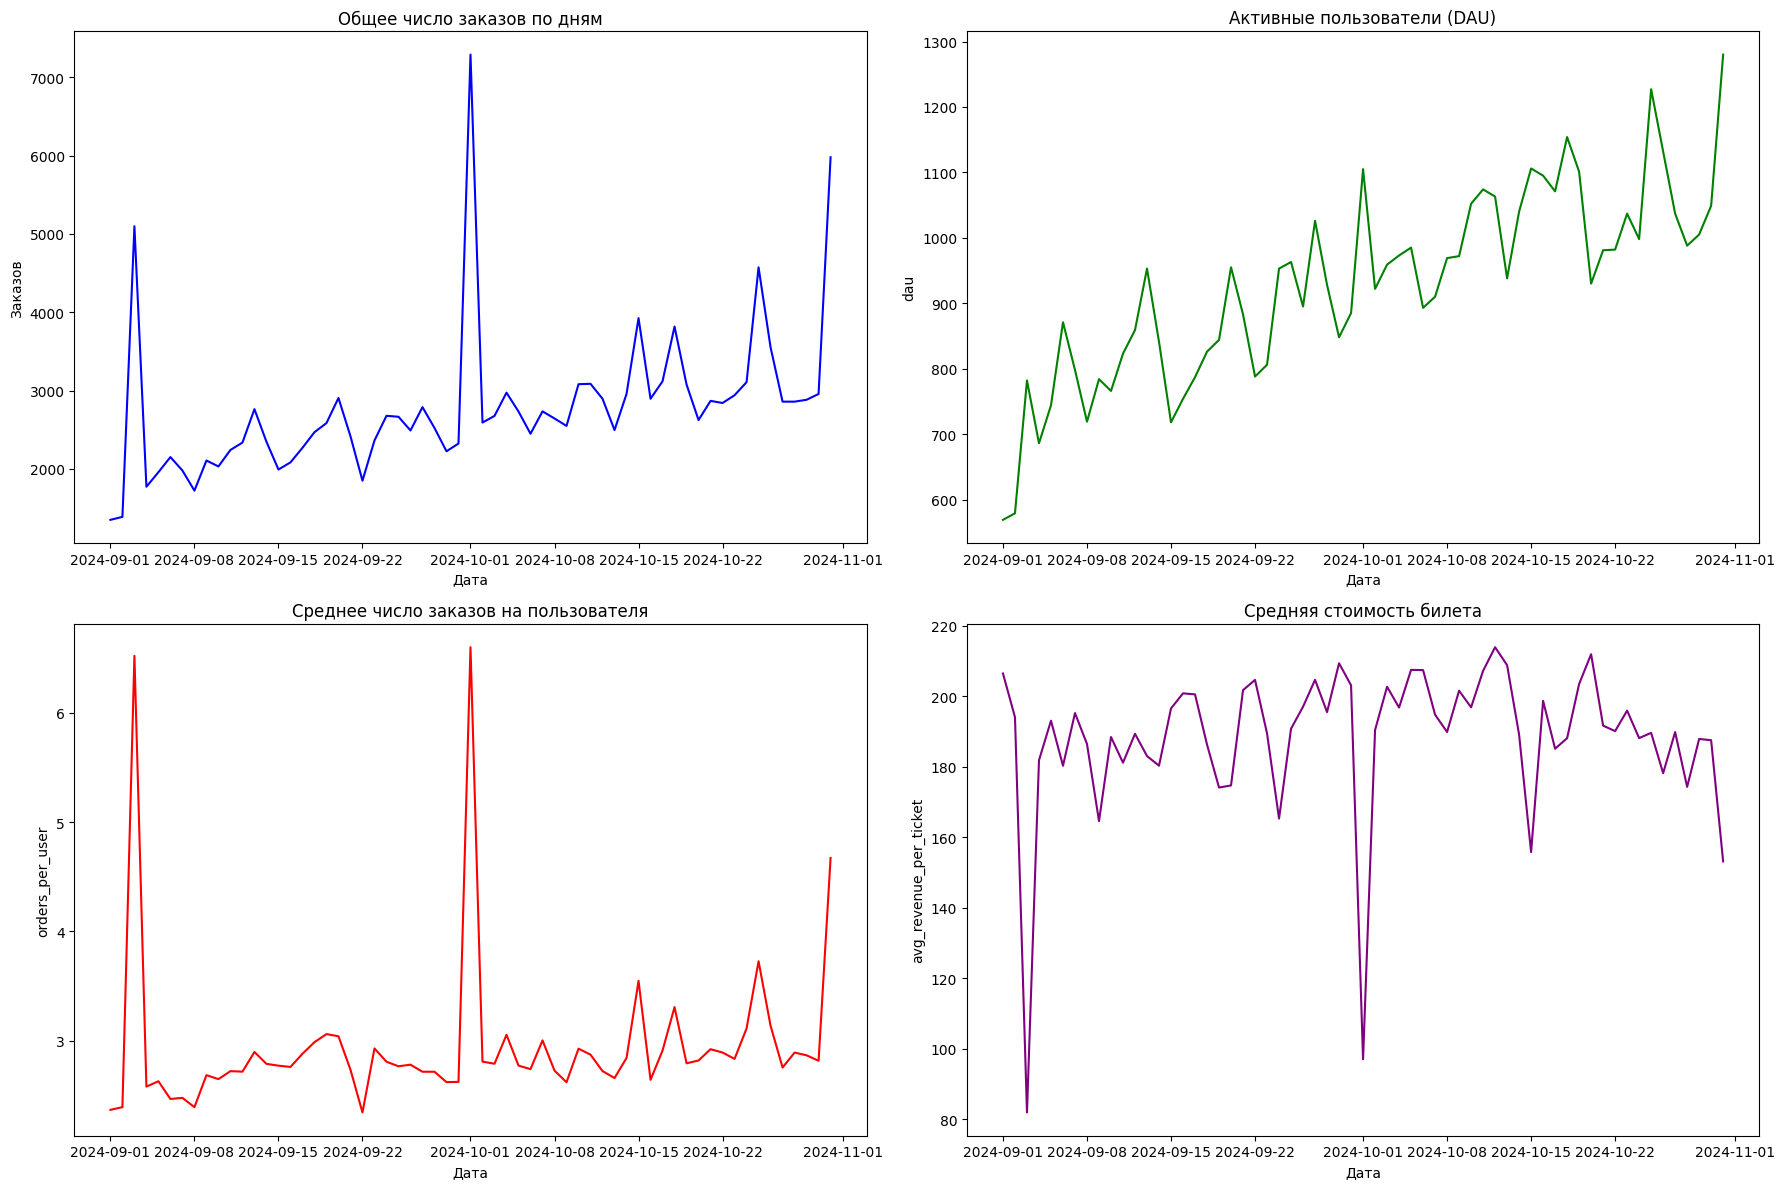

In [574]:
# Динамика по дням

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Общее число заказов
sns.lineplot(data=daily_stats, 
             x='created_dt_msk', 
             y='total_orders', 
             ax=axes[0,0], 
             color='blue')
axes[0,0].set_title('Общее число заказов по дням')
axes[0,0].set_xlabel('Дата')
axes[0,0].set_ylabel('Заказов')

# DAU
sns.lineplot(data=daily_stats, 
             x='created_dt_msk', 
             y='dau', 
             ax=axes[0,1], 
             color='green')
axes[0,1].set_title('Активные пользователи (DAU)')
axes[0,1].set_xlabel('Дата')

# Заказов на пользователя
sns.lineplot(data=daily_stats, 
             x='created_dt_msk', 
             y='orders_per_user', 
             ax=axes[1,0], 
             color='red')
axes[1,0].set_title('Среднее число заказов на пользователя')
axes[1,0].set_xlabel('Дата')

#  Средняя стоимость билета
sns.lineplot(data=daily_stats, 
             x='created_dt_msk', 
             y='avg_revenue_per_ticket', 
             ax=axes[1,1], 
             color='purple')
axes[1,1].set_title('Средняя стоимость билета')
axes[1,1].set_xlabel('Дата')

plt.tight_layout()
plt.show()

**Вывод:**\
*Общее количество заказов:*
- Максимум свыше 7000 заказов 1 октября 2024 года
- Заметны еженедельные пики
  
*Активные пользователи:*
- Пики не совпадают с днями рекордных по общему количеству заказов
- Замечен резкий спад 2024-09-07

*Среднее число заказов на пользователя:*
- Наиболее распространено 2 заказа на пользователя
- Пики приходят на будние дни

*Средняя стоимость билета:*
- В дни, когда было приобретено, наибольшее количество билетов, была наименьшая средняя стоимость билета
- К ноябрю произошло снижение стоимость до 200 рублей.

In [575]:
# Группировка по дням недели
weekday_stats = daily_stats.groupby(['day_of_week', 'is_weekend']).agg({
    'total_orders': 'mean',
    'dau': 'mean',
    'orders_per_user': 'mean',
    'avg_revenue_per_ticket': 'mean'
}).reset_index()

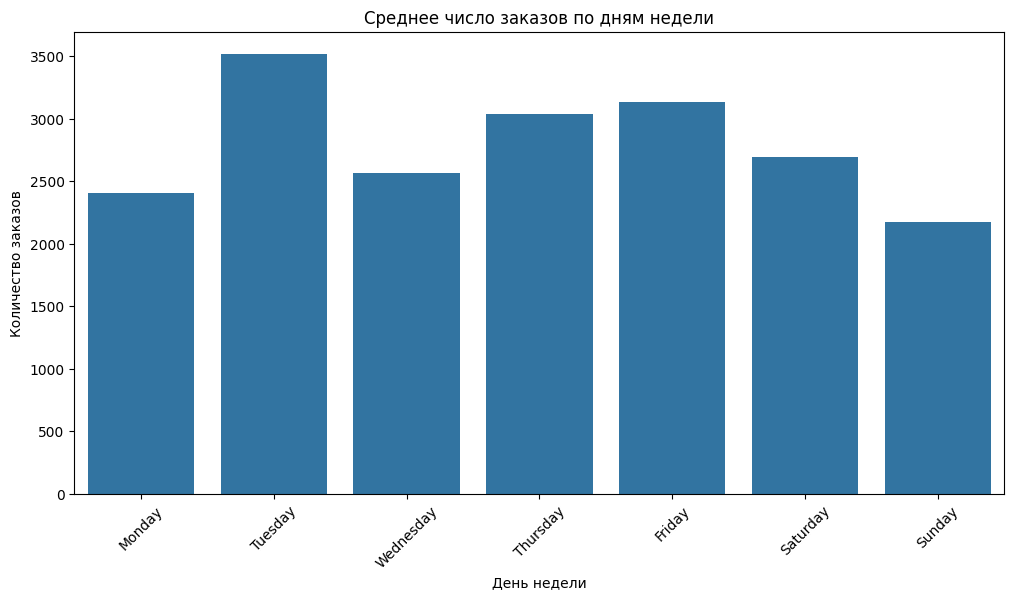

In [576]:
# Недельная цикличность

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=weekday_stats, 
            x='day_of_week', 
            y='total_orders',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Среднее число заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.show()

**Вывод:**
- Пиковые дни - вторник (3500 заказов) и пятница (свыше 3000 заказов)
- В воскресенье минимальная активность

**Промежуточный вывод:**
- Пики в основном приходят на вторник, в выходные дни в среднем совершается меньше заказов, чем в будние
- В дни с минимальной стоимость билетов продается больше билетов
- С субботы по понедельник билеты продаются хуже всего. Пиковые значения выпадают на четверг и пятницу

### Популярные события и партнёры

In [577]:
# Группировка для регионов
region_stats = df.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),  
    total_orders=('order_id', 'count'),     
    total_revenue=('revenue_rub', 'sum')    
).sort_values('total_revenue', ascending=False)

In [578]:
# Доли
region_stats['events_share'] = region_stats['unique_events'] / region_stats['unique_events'].sum() * 100
region_stats['orders_share'] = region_stats['total_orders'] / region_stats['total_orders'].sum() * 100

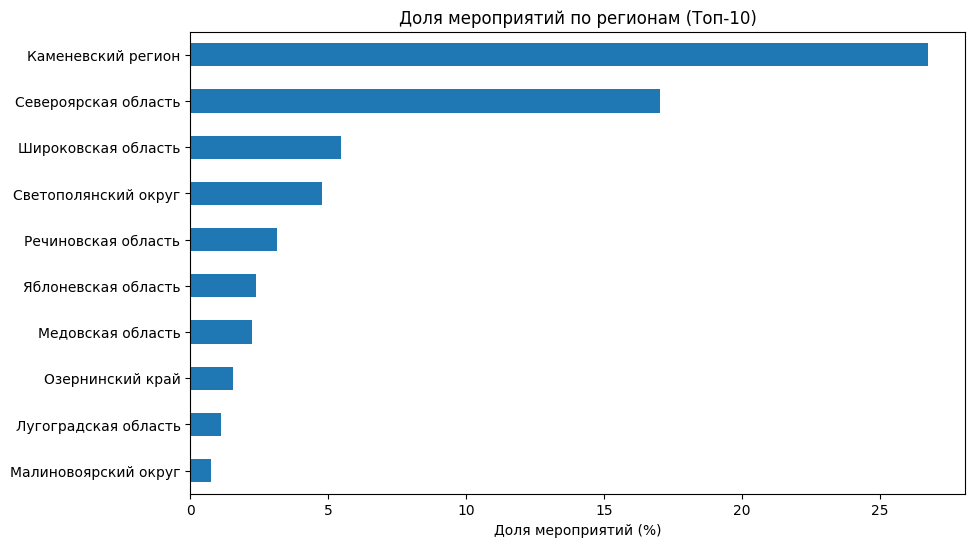

In [579]:
plt.figure(figsize=(10, 6))

top_region = region_stats['events_share'].head(10).sort_values(ascending=True)

top_region.plot(
    kind='barh', 
    title='Доля мероприятий по регионам (Топ-10)')

plt.xlabel('Доля мероприятий (%)')
plt.ylabel('')
plt.show()

**Вывод:**
- Каменевский регион и Северовская область занимают первые места по доле мероприятий
- Наличие явного лидера и постепенное снижение доли мероприятий в остальных регионах говорит о неравномерном распределении активности

In [580]:
# Группировка для партнеров
partner_stats = df.groupby('service_name', observed=True).agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).sort_values('total_revenue', ascending=False)

In [581]:
# Cредний чек
partner_stats['avg_revenue'] = partner_stats['total_revenue'] / partner_stats['total_orders']

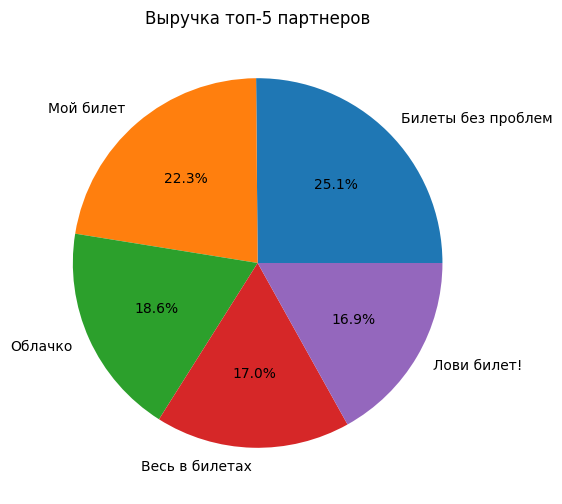

In [582]:
plt.figure(figsize=(10, 6))

top_partner = partner_stats['total_revenue'].head(5)

top_partner.plot(
    kind='pie',
    autopct='%.1f%%',
    title='Выручка топ-5 партнеров'
)

plt.ylabel('')
plt.show()

**Вывод:**
- "Билеты без проблем" занимает первое место с 25.1% выручки
- Некоторые партнеры имеют сравнительно близкие показатели, но значительно уступают лидеру

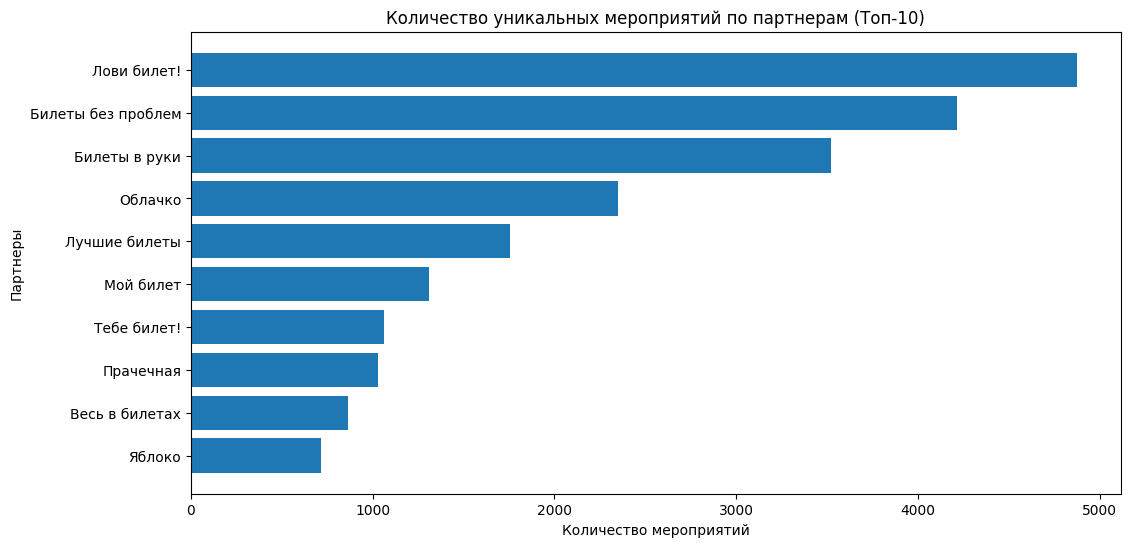

In [603]:
# Количество уникальных мероприятий по партнерам
plt.figure(figsize=(12, 6))

partner_stats_sorted = partner_stats.sort_values('unique_events').tail(10)
bars = plt.barh(
    partner_stats_sorted.index,
    partner_stats_sorted['unique_events'])

plt.title('Количество уникальных мероприятий по партнерам (Топ-10)')
plt.xlabel('Количество мероприятий')
plt.ylabel('Партнеры')
plt.show()

**Вывод:**
- "Билеты без проблем" и "Лови билет!" значительно опережают остальных партнеров по количеству уникальных мероприятий, "Билеты без проблем" также возглавляют топ по выручке, однако "Лови билет!" звершает топ-5 по выручке
- Наблюдается сильный перекос в сторону двух партнеров

**Промежуточный вывод:**

- Среди регионов явным лидером является Каменевский регион, который значительно опережает остальные. Распределение долей мероприятий неравномерное, с резким спадом после первых позиций

- Среди партнеров выделяются "Билеты без проблем" (лидер по выручке) и "Лови билет!" (лидер по количеству мероприятий). Остальные партнеры имеют значительно меньшие показатели

- Общее распределение данных демонстрирует наличие явных лидеров как среди регионов, так и среди партнеров, с высокой долей концентрации в топ-категориях и слабой представленностью остальных участников

<a class="anchor" id="4-bullet"></a>
## 4. Статистический анализ данных

### Первая гипотеза. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств

**Нулевая гипотеза $(Н_0)$:** Среднее количество заказов у мобильных и десктопных пользователей одинаково

**Альтернативная гипотеза $(Н_1)$:** Среднее количество заказов у мобильных пользователей выше

$\begin{equation*}
 \begin{cases}
   H_0 :\text{$\mu_{mobile} = \mu_{desktop}$}\\
   H_1 :\text{$\mu_{mobile} > \mu_{desktop}$}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$ 

In [584]:
# Количество заказов на пользователя
orders_per_user = autumn_data.groupby(['user_id', 'device_type_canonical'], observed=True)['order_id'].count().reset_index()

In [585]:
# Разделение на группы
mobile_orders = orders_per_user[orders_per_user['device_type_canonical'] == 'mobile']['order_id']
desktop_orders = orders_per_user[orders_per_user['device_type_canonical'] == 'desktop']['order_id']

In [586]:
# Описательная статистика
print('Мобильные пользователи:')
print(mobile_orders.describe())

print('\nДесктопные пользователи:')
print(desktop_orders.describe())

Мобильные пользователи:
count    14230.000000
mean         9.502530
std         68.356888
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4355.000000
Name: order_id, dtype: float64

Десктопные пользователи:
count    4906.000000
mean        7.061761
std        36.074134
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1503.000000
Name: order_id, dtype: float64


Значительная разница между средним и медианой указывает на сильную правостороннюю асимметрию, что нехарактерно для нормального распределения (где mean ≈ median), поэтому можно использовать непараметрический тест Манна-Уитни.

In [587]:
alpha = 0.05

stat_mw, p_value_mw = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

print(f'pvalue={p_value_mw}')

if p_value_mw > alpha: 
    print('Нулевая гипотеза находит подтверждение!')
    text_interpretation = 'не больше'
else:
    print('Нулевая гипотеза не находит подтверждения!')
    text_interpretation = 'больше'

print(f'\nСреднее количество заказов у мобильных пользователей {text_interpretation}, чем у десктопных (p = {p_value_mw})')

pvalue=1.4981605059570675e-07
Нулевая гипотеза не находит подтверждения!

Среднее количество заказов у мобильных пользователей больше, чем у десктопных (p = 1.4981605059570675e-07)


- По результатам этого теста можно принять альтернативную гипотезу: мобильные пользователи действительно совершают больше заказов, чем десктопные.

### Вторая гипотеза. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

**Нулевая гипотеза $(Н_0)$:** Среднее время между заказами у мобильных и десктопных пользователей одинаково

**Альтернативная гипотеза $(Н_1)$:** Среднее время между заказами у мобильных пользователей больше

$\begin{equation*}
 \begin{cases}
   H_0 :\text{$\mu_{mobile} = \mu_{desktop}$}\\
   H_1 :\text{$\mu_{mobile} > \mu_{desktop}$}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$ 

In [588]:
# Пользователи, совершившие более 2 заказов
users_with_orders = autumn_data.groupby('user_id').filter(lambda x: len(x) > 1)

In [589]:
# Дни между заказами
time_between_orders = users_with_orders.groupby('user_id')['created_dt_msk'].apply(
    lambda x: x.diff().dt.days.mean()
).reset_index(name='avg_days_between_orders')

In [590]:
# Добавляем тип устройства
time_between_orders = time_between_orders.merge(
    users_with_orders.drop_duplicates('user_id')[['user_id', 'device_type_canonical']],
    on='user_id'
)

In [591]:
# Делим на группы
mobile_time = time_between_orders[time_between_orders['device_type_canonical'] == 'mobile']['avg_days_between_orders']
desktop_time = time_between_orders[time_between_orders['device_type_canonical'] == 'desktop']['avg_days_between_orders']

In [592]:
print('Мобильные пользователи:')
print(mobile_time.describe())

print('\nДесктопные пользователи:')
print(desktop_time.describe())

Мобильные пользователи:
count    7860.000000
mean        6.190287
std         8.901584
min       -52.000000
25%         0.040973
50%         3.062500
75%         8.250000
max        59.000000
Name: avg_days_between_orders, dtype: float64

Десктопные пользователи:
count    1587.000000
mean        5.801539
std         8.518389
min       -38.000000
25%         0.000000
50%         2.800000
75%         7.500000
max        57.000000
Name: avg_days_between_orders, dtype: float64


Распределение не является нормальным, поэтому можно использовать непараметрический тест Манна-Уитни.

In [593]:
alpha = 0.05

stat_mw, p_value_mw = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

print(f'pvalue={p_value_mw}')

if p_value_mw > alpha: 
    print('Нулевая гипотеза находит подтверждение!')
    text_interpretation = 'не больше'
else:
    print('Нулевая гипотеза не находит подтверждения!')
    text_interpretation = 'больше'

print(f'\nСреднее время между заказами у мобильных пользователей {text_interpretation}, чем у десктопных (p = {p_value_mw})')

pvalue=1.4981605059570675e-07
Нулевая гипотеза не находит подтверждения!

Среднее время между заказами у мобильных пользователей больше, чем у десктопных (p = 1.4981605059570675e-07)


- Пользователи мобильных устройств дольше возвращаются к новым заказам, чем десктопные.

**Промежуточный вывод:**
- Мобильные пользователи совершают больше заказов, но реже возвращаются. Гипотеза о большей активности подтверждается, но с оговоркой: их поведение менее регулярное.
- Десктопные пользователи менее активны по количеству заказов, но более стабильны в повторных покупках.

<a class="anchor" id="5-bullet"></a>
## 5. Общий вывод и рекомендации

Мы проанализировали осенние продажи билетов на Яндекс Афише 2024 года. В работе использованы три датасета: заказы (`orders`), события (`events`) и курс тенге (`tenge`). Данные были очищены от дубликатов, пропусков и выбросов, что позволило получить 290 062 корректных записей.

**Выводы:**

- Осенью спрос на билеты значительно возрастает, пик приходится на октябрь

- Театральные и семейные мероприятия становятся популярнее, в то время как концерты теряют долю

- Средний чек на театр и кино увеличился, в то время как билеты на концерты стали дешевле

- Чаще всего заказы оформляют во вторник и пятницу, реже — в воскресенье

- Каменевский регион и Северовская область лидируют по количеству мероприятий

- Партнерские сервисы имеют разную эффективность в привлечении пользователей и генерации выручки

- Мобильные пользователи оформляют больше заказов, но возвращаются реже. Десктопные клиенты делают меньше покупок, но остаются более лояльными

- Десктопные пользователи менее активны по количеству заказов, но их покупки более регулярны

**Рекомендации:**

- Продвигать мероприятия в дни наибольшего спроса (вторник, пятница)

- Акцентировать внимание на регионах с высокой активностью

- Усилить рекламу театров и семейных событий в осенний период

- Осенью пересмотреть стратегию ценообразования на концерты (снижение цен может привлечь больше аудитории)

- Развивать партнерства в регионах с высоким спросом

- Для мобильных пользователей предлагать бонусы за регулярные покупки, чтобы увеличить частоту заказов

- Для десктопных пользователей ориентироваться на лояльность и предлагать подписки, скидки за многократные покупки